# Install the ucimlrepo package and import libraries

In [1]:
import numpy as np
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import warnings
warnings.filterwarnings('ignore')
# Set the random seed
np.random.seed(1234)

# Load and preprocess the dataset 1 for Linear Regression

In [2]:
# fetch dataset 
infrared_thermography_temperature = fetch_ucirepo(id=925) 

# data (as pandas dataframes) 
X = infrared_thermography_temperature.data.features 
y = infrared_thermography_temperature.data.targets 

print(infrared_thermography_temperature.variables)
#Keep only aveOralM as target
y = y.drop('aveOralF', axis=1)

#Look at the different ages and see how many there are of each
print(X['Age'].value_counts())
X_filtered = X[X['Age'] != '21-30'] #remove age category 21-30, overlap and small

#Check for null
print(X.isnull().sum())
X = X.drop('Distance',axis=1)

           name     role         type demographic  \
0     SubjectID       ID  Categorical        None   
1      aveOralF   Target   Continuous        None   
2      aveOralM   Target   Continuous        None   
3        Gender  Feature  Categorical      Gender   
4           Age  Feature  Categorical         Age   
5     Ethnicity  Feature  Categorical   Ethnicity   
6         T_atm  Feature   Continuous        None   
7      Humidity  Feature   Continuous        None   
8      Distance  Feature   Continuous        None   
9     T_offset1  Feature   Continuous        None   
10    Max1R13_1  Feature   Continuous        None   
11    Max1L13_1  Feature   Continuous        None   
12  aveAllR13_1  Feature   Continuous        None   
13  aveAllL13_1  Feature   Continuous        None   
14        T_RC1  Feature   Continuous        None   
15    T_RC_Dry1  Feature   Continuous        None   
16    T_RC_Wet1  Feature   Continuous        None   
17    T_RC_Max1  Feature   Continuous        N

##### Prepare the columns with one hot encoder

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_columns = ['Gender', 'Age', 'Ethnicity']
numerical_columns = X.select_dtypes(include=[np.number]).columns.tolist()

# Create the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_columns)
    ])

# Create a pipeline that combines preprocessing and scaling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler())
])

# Fit and transform the data
scaled_encoded_data = pipeline.fit_transform(X)

# Get feature names after preprocessing
feature_names = (preprocessor.named_transformers_['num'].get_feature_names_out().tolist() + 
                 preprocessor.named_transformers_['cat'].get_feature_names_out().tolist())


# Convert the scaled features and targets to DataFrame
X_prepared = pd.DataFrame(scaled_encoded_data, columns=feature_names)

merged_d1_one = X_prepared.join(y)
print("Prepared merged shape", merged_d1_one.shape)
print("Prepared features shape:", X_prepared.shape)
print("Prepared targets shape:", y.shape)

Prepared merged shape (1020, 43)
Prepared features shape: (1020, 42)
Prepared targets shape: (1020, 1)


#### Prepare the categorical columns with label encoder

In [4]:
from sklearn.preprocessing import LabelEncoder

Xl = X

le = LabelEncoder()
Xl['Age'] = le.fit_transform(Xl['Age'])
Xl['Ethnicity'] = le.fit_transform(Xl['Ethnicity'])
Xl['Gender'] = le.fit_transform(Xl['Gender'])

scaler = StandardScaler()
Xl_scaled = scaler.fit_transform(Xl)

Xl_prepared = pd.DataFrame(Xl_scaled, columns=Xl.columns)
# we get no null values in the features and the targets so we can proceed with the scaling.
merged_d1_l = Xl_prepared.join(y)
print("Prepared features shape:", merged_d1_l.shape)
print("Prepared features shape:", Xl_prepared.shape)
print("Prepared targets shape:", y.shape)

Prepared features shape: (1020, 33)
Prepared features shape: (1020, 32)
Prepared targets shape: (1020, 1)


# Load and preprocess the dataset 2 for Logistic regression

In [5]:
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X2 = cdc_diabetes_health_indicators.data.features 
y2 = cdc_diabetes_health_indicators.data.targets 
  
print(cdc_diabetes_health_indicators.variables) 

print(X2.isnull().sum())
print(y2.isnull().sum())

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

In [6]:
#Scale the data
scaler = StandardScaler()
X2 = X2
X2_scaled = scaler.fit_transform(X2)

# Convert to DataFrame for better handling
X2_prepared = pd.DataFrame(X2_scaled, columns=X2.columns)
# we get no null values in the features and the targets so we can proceed with the scaling.
print("Prepared features shape:", X2_prepared.shape)
print("Prepared targets shape:", y2.shape)

merged_df2 = X2_prepared.join(y2)
print("merged df shape:", merged_df2.shape)
print(merged_df2.info())

Prepared features shape: (253680, 21)
Prepared targets shape: (253680, 1)
merged df shape: (253680, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  AnyHealthcare         253680 non-null  float64
 12  NoDocbcCost           253680 non-null  float64
 13  

# Implement Analytical Linear Regression


In [7]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass
    
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        
        self.w = np.linalg.inv(x.T @ x)@x.T@y
        # self.w = np.linalg.lstsq(x, y)[0] 
        return self
    
    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

# Implement Logistics Regression

In [8]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad   

class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        
    def fit(self, x, y):
        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.values.ravel()
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient            #initialize the gradient method of the LogisticRegression class with gradient function

# Implement Mini Batch Stochastic Gradient Descent


In [9]:
class GradientDescent:
    
    def __init__(self, learning_rate=.001, max_iters=1e4, epsilon=1e-8, record_history=False,verbose = False):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.verbose = verbose
        if record_history:
            self.w_history = []                 #to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            w = w - self.learning_rate * grad         # weight update step
            if self.record_history:
                self.w_history.append(w)
            # print(np.linalg.norm(grad))
            t += 1
            
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(grad)}')
            # print(f'the weight found: {w}')
            
        return w

In [10]:
class LinearRegressionSGD:
    def __init__(self, add_bias=True, batch_size=32):
        self.add_bias = add_bias
        self.batch_size = batch_size
    
    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N, D = x.shape
        
        def mini_batch_gradient(x, y, w):
            # Randomly select a mini-batch
            
            indices = np.random.choice(N, self.batch_size, replace=False)
            # print(type(x),type(y))
            x_batch = x[indices, :]
            y_batch = y.values[indices, :].ravel()
            
            # Compute gradient on the mini-batch
            yh = x_batch @ w
            grad = np.dot(yh - y_batch,x_batch) / self.batch_size
            # print(grad.shape)
            return grad
        
        w0 = np.zeros(D)  # initialize the weights to 0
        self.w = optimizer.run(mini_batch_gradient, x, y, w0)  # run the optimizer to get the optimal weights

        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        yh = x @ self.w
        return yh

### Momentum gradient descent

In [11]:
class GradientDescentM:
    
    def __init__(self, learning_rate=0.001, momentum=0.9, max_iters=1e4, epsilon=1e-8, record_history=False, verbose=False):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iters = max_iters
        self.record_history = record_history
        self.epsilon = epsilon
        self.verbose = verbose
        if record_history:
            self.w_history = []                 # to store the weight history for visualization
            
    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        velocity = np.zeros_like(w)  # Initialize velocity vector
        
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iters:
            grad = gradient_fn(x, y, w)               # compute the gradient with present weight
            
            # Update velocity
            velocity = self.momentum * velocity - self.learning_rate * grad
            
            # Update weights using velocity
            w = w + velocity
            
            if self.record_history:
                self.w_history.append(w)
            
            t += 1
            
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(grad)}')
            
        return w

In [12]:
logistic = lambda z: 1./ (1 + np.exp(-z))       #logistic function

def gradientSGD(self, x, y):
    N, D = x.shape
    
    indices = np.random.choice(N, self.batch_size, replace=False)
    x_batch = x[indices, :]
    y_batch = y[indices]
            
    N,D = x.shape
    yh = logistic(np.dot(x_batch, self.w))    # predictions  size N
    grad = np.dot(x_batch.T, yh - y_batch)/N        # divide by N because cost is mean over N points
    return grad   

class LogisticRegressionSGD:
    
    def __init__(self, add_bias=True, batch_size = 32, learning_rate=0.01, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose
        self.batch_size = batch_size
        
    def fit(self, x, y):
        if isinstance(y, (pd.DataFrame, pd.Series)):
            y = y.values.ravel()
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradientSGD(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegressionSGD.gradientSGD = gradientSGD             #initialize the gradient method of the LogisticRegression class with gradient function

# Experiments 

### Experiment 1.1: Running Linear Regression on Dataset 1 using One hot Encoding and plot feature weights

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random


iterations = random.sample(range(1,100000),10000)

all_mse = []
all_rmse = []
all_mae = []
all_r2 = []
all_weights = []

for count, i in enumerate(iterations):
    # Split the data with a different random state each time
    X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=i)
    
    # Fit the model and make predictions
    model = LinearRegression()
    lr_model = model.fit(X_train, y_train)
    yh = lr_model.predict(X_test)
    
    mse = mean_squared_error(y_test, yh)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, yh)
    r2 = r2_score(y_test, yh)
    
    if r2 <= 0 or r2 >=1:
        continue
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_mae.append(mae)
    all_r2.append(r2)
    all_weights.append(lr_model.w.values)
    
    print(f"\rCount: {count+1}/10000", end="", flush=True)

# Convert list of predictions to an average
avg_mse = np.mean(all_mse, axis = 0)
avg_rmse = np.mean(all_rmse, axis = 0)
avg_mae = np.mean(all_mae, axis = 0)
avg_r2 = np.mean(all_r2, axis = 0)
avg_weights = np.mean(all_weights, axis = 0)
    
print("\n")


print(f"Mean Squared Error: {avg_mse:.4f}")
print(f"Root Mean Squared Error: {avg_rmse:.4f}")
print(f"Mean Absolute Error: {avg_mae:.4f}")
print(f"R-squared Score: {avg_r2:.4f}")

Count: 10000/10000

Mean Squared Error: 0.0688
Root Mean Squared Error: 0.2620
Mean Absolute Error: 0.2056
R-squared Score: 0.7255


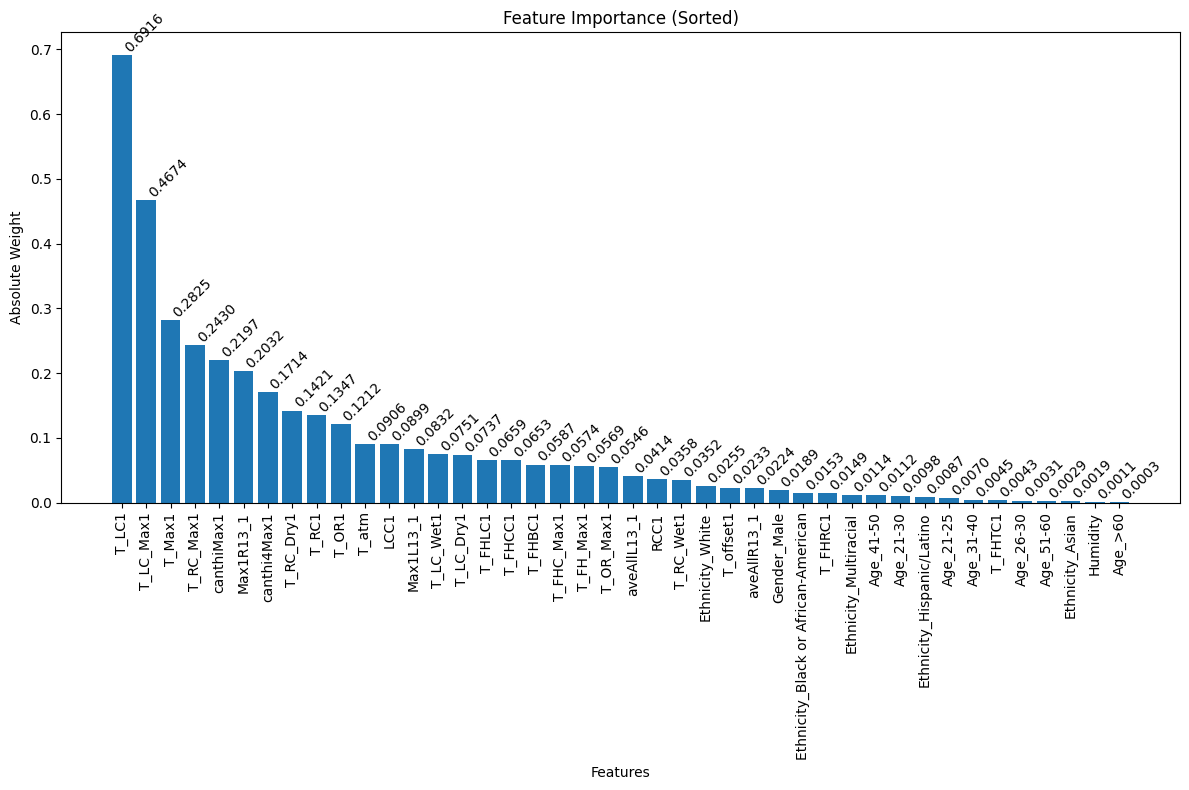

In [14]:
feature_importances = np.abs(avg_weights.flatten())  # Take absolute values for importance

# Get feature names
feature_names = X_train.columns

# Create a list of tuples (feature_name, importance)
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sort the pairs by importance in descending order
sorted_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Unzip the sorted pairs
sorted_features, sorted_importances = zip(*sorted_pairs)

# Create the plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_features)), sorted_importances)
plt.title('Feature Importance (Sorted)')
plt.xlabel('Features')
plt.ylabel('Absolute Weight')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(sorted_importances):
    plt.text(i, v, f'{v:.4f}', ha='left', va='bottom', rotation=45)

plt.show()

### Experiment 1.2 : Running linear regression with dataset 1 using label encoded and plot feature weights.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random

n_test = 10000
iterations = random.sample(range(1,100000),n_test)
all_mse = []
all_rmse = []
all_mae = []
all_r2 = []
all_weights = []

for count, i in enumerate(iterations):
    # Split the data with a different random state each time
    X_train, X_test, y_train, y_test = train_test_split(Xl_prepared, y, test_size=0.2, random_state=i)
    
    # Fit the model and make predictions
    model = LinearRegression()
    lr_model = model.fit(X_train, y_train)
    yh = lr_model.predict(X_test)
    
    mse = mean_squared_error(y_test, yh)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, yh)
    r2 = r2_score(y_test, yh)
    
    if r2 <= 0 or r2 >=1:
        continue
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_mae.append(mae)
    all_r2.append(r2)
    all_weights.append(lr_model.w.values)
    
    print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

# Convert list of predictions to an average
avg_mse = np.mean(all_mse, axis = 0)
avg_rmse = np.mean(all_rmse, axis = 0)
avg_mae = np.mean(all_mae, axis = 0)
avg_r2 = np.mean(all_r2, axis = 0)
avg_weights = np.mean(all_weights, axis = 0)

print("\n")
print(f"Mean Squared Error: {avg_mse:.4f}")
print(f"Root Mean Squared Error: {avg_rmse:.4f}")
print(f"Mean Absolute Error: {avg_mae:.4f}")
print(f"R-squared Score: {avg_r2:.4f}")

Count: 10000/10000

Mean Squared Error: 0.0679
Root Mean Squared Error: 0.2602
Mean Absolute Error: 0.2034
R-squared Score: 0.7306


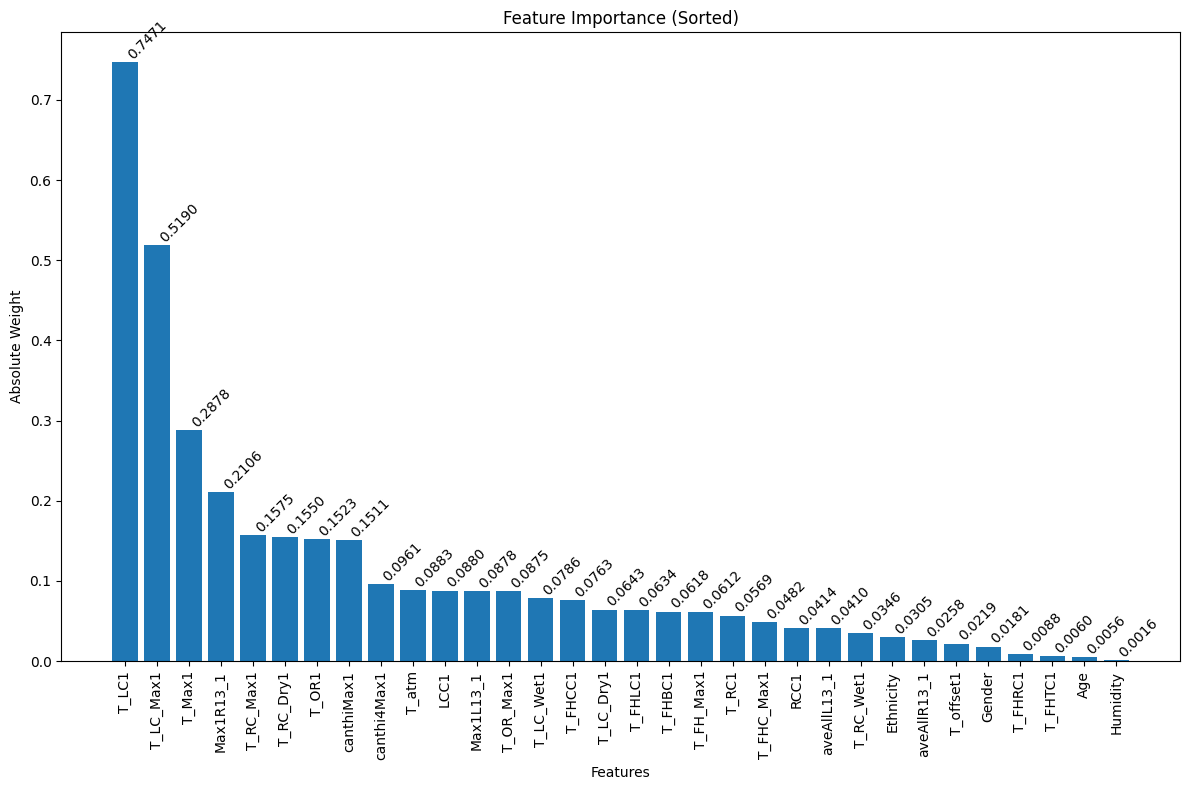

In [16]:
feature_importances = np.abs(avg_weights.flatten())  # Take absolute values for importance

# Get feature names
feature_names = X_train.columns

# Create a list of tuples (feature_name, importance)
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sort the pairs by importance in descending order
sorted_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Unzip the sorted pairs
sorted_features, sorted_importances = zip(*sorted_pairs)

# Create the plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_features)), sorted_importances)
plt.title('Feature Importance (Sorted)')
plt.xlabel('Features')
plt.ylabel('Absolute Weight')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(sorted_importances):
    plt.text(i, v, f'{v:.4f}', ha='left', va='bottom', rotation=45)

plt.show()

### Experiment 1.2+ : Running linear regression with dataset 1 using label encoded and plot feature weights.

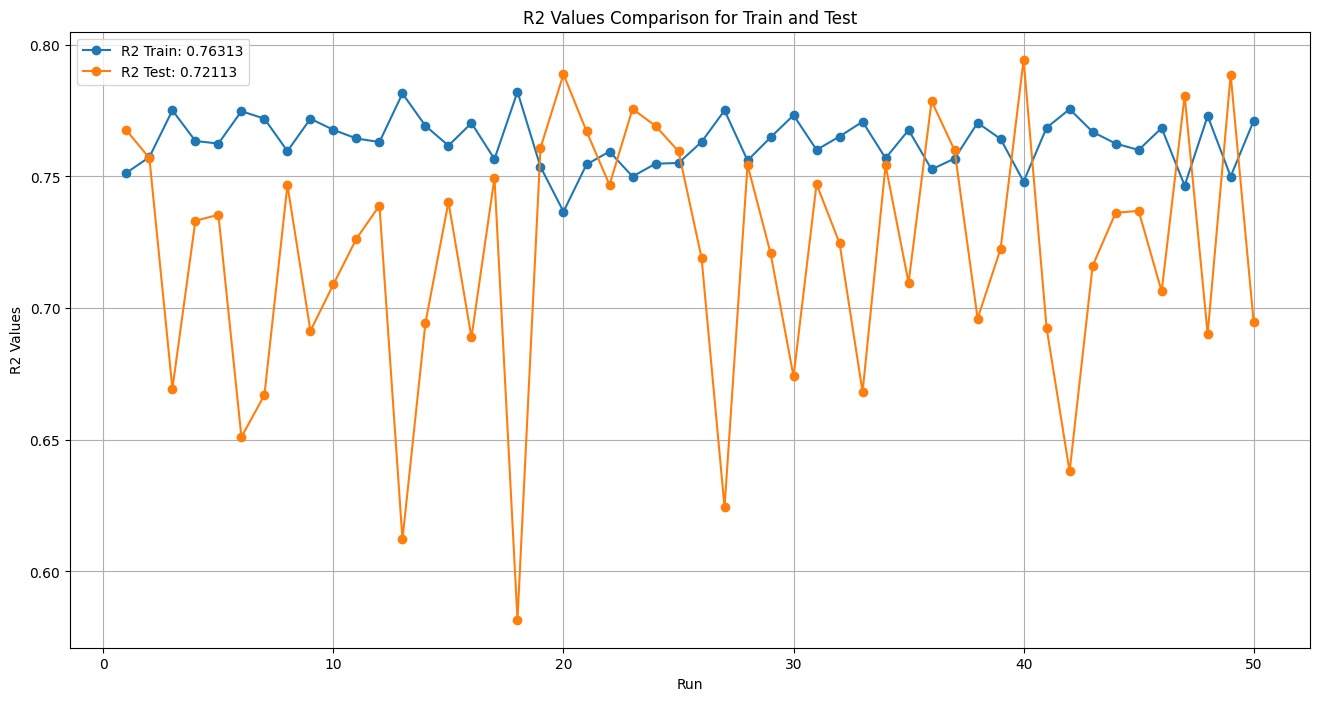

In [17]:
import sklearn as skl

r2_value_test = []
r2_value_train = []

for i in range(50):
    x_train, x_test, y_train, y_test = train_test_split(Xl_prepared, y, test_size=0.2, random_state=2134+1234*i, shuffle=True)

    model = LinearRegression()

    yh = model.fit(x_train,y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)

    r2_test = skl.metrics.r2_score(y_test, y_pred_test)
    r2_train = skl.metrics.r2_score(y_train, y_pred_train)

    r2_value_test.append(r2_test)
    r2_value_train.append(r2_train)

r2_test_mean = (np.mean(r2_value_test))
r2_train_mean = (np.mean(r2_value_train))

runs =list(range(1, 51))
plt.figure(figsize=(16,8))
plt.plot(runs, r2_value_train, label='R2 Train', marker='o')
plt.plot(runs, r2_value_test, label='R2 Test', marker='o')
plt.title('R2 Values Comparison for Train and Test')
plt.xlabel('Run')
plt.ylabel('R2 Values')
plt.legend([f'R2 Train: {r2_train_mean:.5f}', f'R2 Test: {r2_test_mean:.5f}'])
plt.grid(True)
plt.show()

### Experiment 1.3 Growing subsets of data for lr with one hot encoding

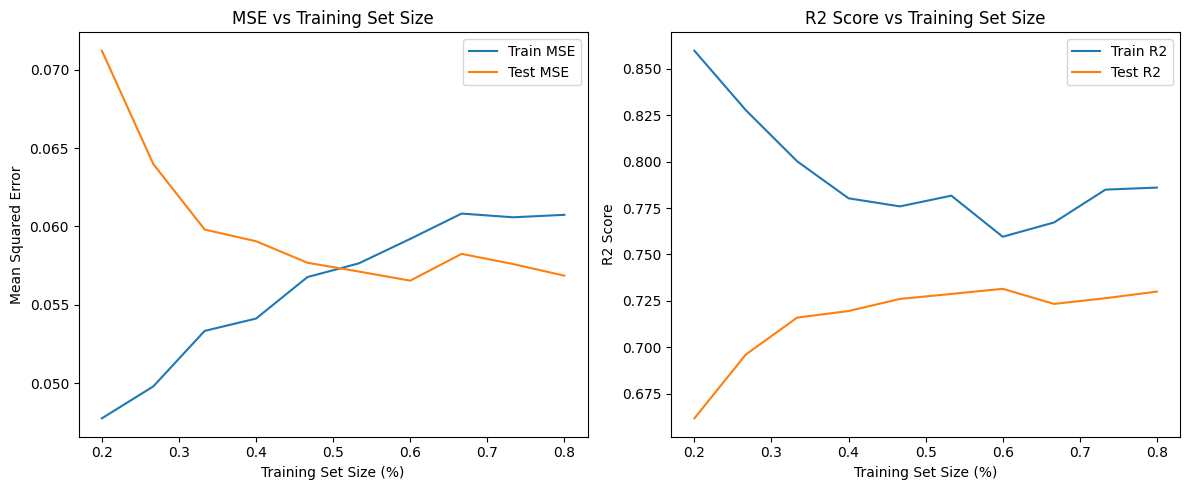

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, r2

# Initialize lists to store results
train_sizes = np.linspace(0.2, 0.8, 10)
train_mse = []
test_mse = []
train_r2 = []
test_r2 = []

# Train and evaluate model for different training set sizes
for size in train_sizes:
    # Sample subset of training data
    sample_size = int(len(X_train) * size)
    X_sample = X_train[:sample_size]
    y_sample = y_train[:sample_size]
    
    # Train model
    model = LinearRegression()
    model.fit(X_sample, y_sample)
    
    # Evaluate on training and test sets
    train_mse_score, train_r2_score = evaluate_model(model, X_sample, y_sample)
    test_mse_score, test_r2_score = evaluate_model(model, X_test, y_test)
    
    # Store results
    train_mse.append(train_mse_score)
    test_mse.append(test_mse_score)
    train_r2.append(train_r2_score)
    test_r2.append(test_r2_score)

# Plot results
plt.figure(figsize=(12, 5))

# MSE plot
plt.subplot(1, 2, 1)
plt.plot(train_sizes, train_mse, label='Train MSE')
plt.plot(train_sizes, test_mse, label='Test MSE')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Training Set Size')
plt.legend()

# R2 plot
plt.subplot(1, 2, 2)
plt.plot(train_sizes, train_r2, label='Train R2')
plt.plot(train_sizes, test_r2, label='Test R2')
plt.xlabel('Training Set Size (%)')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Training Set Size')
plt.legend()

plt.tight_layout()
plt.show()

### Experiment 2.1 : Logistic regression results on data 2 using a subset of data and plot feature weights.

In [17]:
#take a subset of X2 and y2.
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
import random 
from sklearn.model_selection import train_test_split


n_test = 50
iterations = random.sample(range(1,10000),n_test)

all_accuracy = []
all_f1 = []
all_precision = []
all_recall = []
all_weights = []

for count, i in enumerate(iterations):
    # Split the data with a different random state each time
    df2_sample = merged_df2.sample(10000)
    X2_prepared = df2_sample.drop("Diabetes_binary",axis=1)
    y2_prepared = df2_sample["Diabetes_binary"]

    X2_train, X2_test, y2_train, y2_test = train_test_split(X2_prepared, y2_prepared, test_size=0.2, random_state=i)
    
    # Fit the model and make predictions
    model = LogisticRegression(learning_rate=0.01,max_iters=100000,verbose=False)
    log_model = model.fit(X2_train, y2_train)
    y2_pred_proba = log_model.predict(X2_test)
        
    y2h = (y2_pred_proba >= 0.5).astype(int)
    
    all_accuracy.append(accuracy_score(y2_test, y2h))
    all_precision.append(precision_score(y2_test, y2h))
    all_f1.append(f1_score(y2_test, y2h))
    all_recall.append(recall_score(y2_test, y2h))
    all_weights.append(log_model.w)
    
    print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

# Convert list of predictions to an average
avg_accuracy =  np.mean(all_accuracy, axis = 0)
avg_f1 = np.mean(all_f1, axis = 0)
avg_precision = np.mean(all_precision, axis = 0)
avg_recall =  np.mean(all_recall, axis = 0)
avg_weights_log = np.mean(all_weights, axis = 0)
    
print("\n")


# mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")

Count: 50/50

Accuracy: 0.8635
Precision: 0.5415
Recall: 0.1602
F1 Score: 0.2462


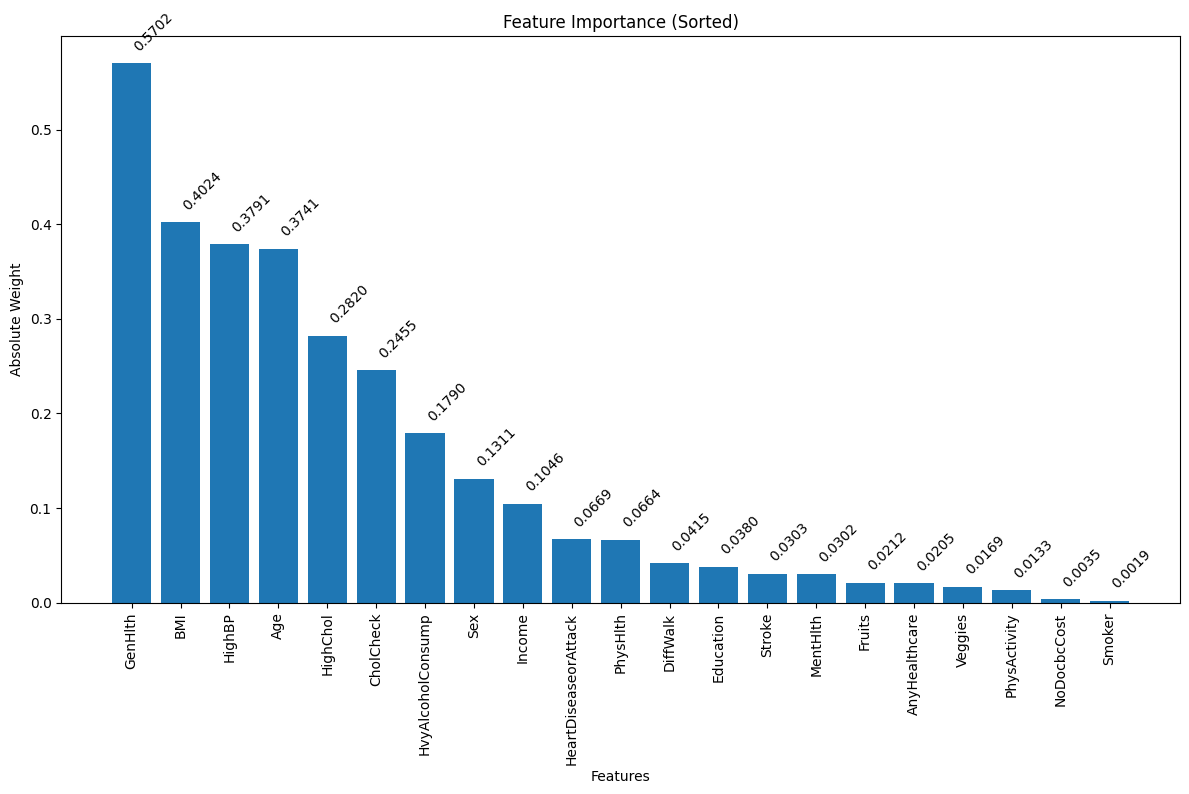

In [18]:
feature_importances = np.abs(avg_weights_log.flatten())  # Take absolute values for importance

# Get feature names
feature_names = X2_train.columns

# Create a list of tuples (feature_name, importance)
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sort the pairs by importance in descending order
sorted_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Unzip the sorted pairs
sorted_features, sorted_importances = zip(*sorted_pairs)

# Create the plot
plt.figure(figsize=(12, 8))
plt.bar(range(len(sorted_features)), sorted_importances)
plt.title('Feature Importance (Sorted)')
plt.xlabel('Features')
plt.ylabel('Absolute Weight')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(sorted_importances):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='left', va='bottom',rotation=45)

plt.show()

### Experiment 2.2 : Test vs Training 

Count: 50/50

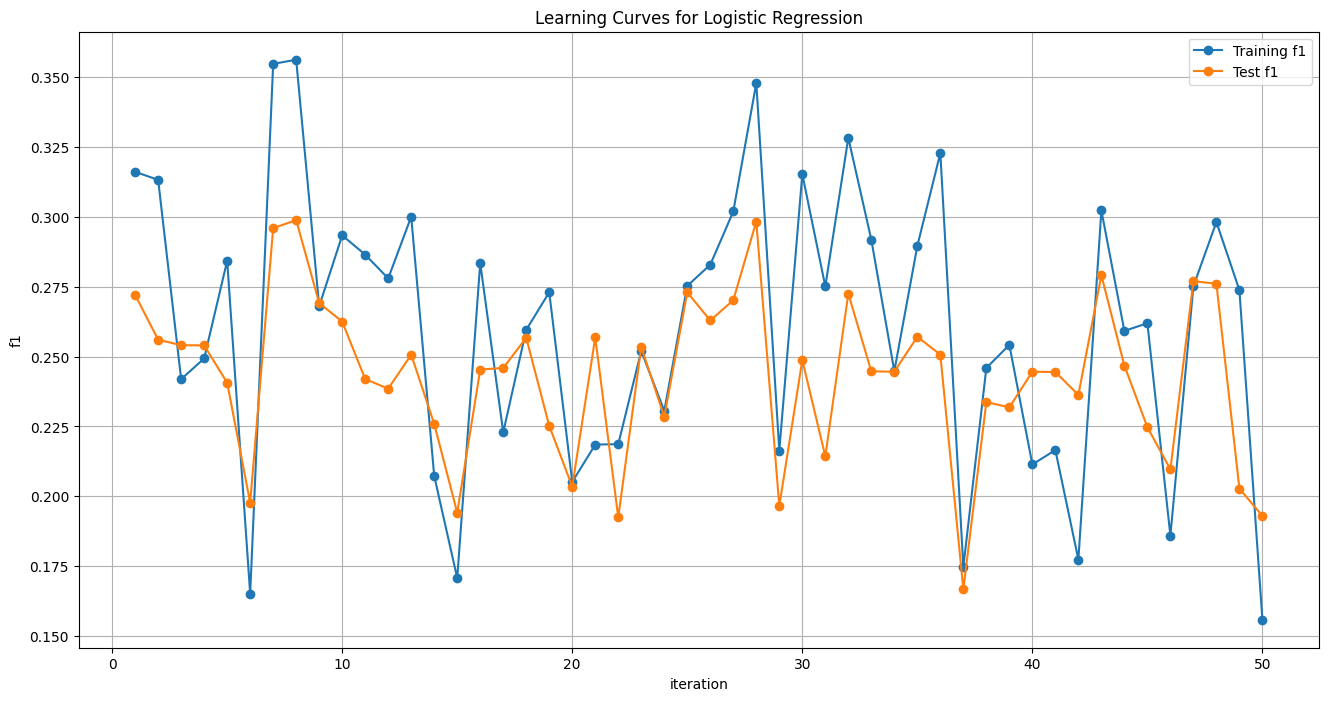

In [19]:
train_scores = []
test_scores = []

# Sample for X2
n_test = 50
iterations = random.sample(range(1,10000),n_test)

for count, i in enumerate(iterations):
    # Sample a subset of the training data
    df2_sample = merged_df2.sample(10000)
    X2_prepared = df2_sample.drop("Diabetes_binary",axis=1)
    y2_prepared = df2_sample["Diabetes_binary"]
    
    X2_sample, _, y2_sample, _ = train_test_split(X2_prepared, y2_prepared, train_size=0.2, random_state=i)
    
    # Initialize and fit the model
    log_model = LogisticRegression(learning_rate=0.01, max_iters=100000)
    log_model.fit(X2_sample, y2_sample)
    
    # Make predictions on train and test sets
    y2_train_pred = (log_model.predict(X2_sample) >= 0.5).astype(int)
    y2_test_pred = (log_model.predict(X2_test) >= 0.5).astype(int)
    
    # Calculate accuracies
    train_f1 = f1_score(y2_sample, y2_train_pred)
    test_f1 = f1_score(y2_test, y2_test_pred)
    
    train_scores.append(train_f1)
    test_scores.append(test_f1)
    
    print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

runs =list(range(1, n_test+1))
# Plot the learning curves
plt.figure(figsize=(16, 8))
plt.plot(runs, train_scores, 'o-', label='Training f1')
plt.plot(runs, test_scores, 'o-', label='Test f1')
plt.title('Learning Curves for Logistic Regression')
plt.xlabel('iteration')
plt.ylabel('f1')
plt.legend()
plt.grid(True)
plt.show()

### Experiment 2.3 : Growing Subsets of data for logistic regression

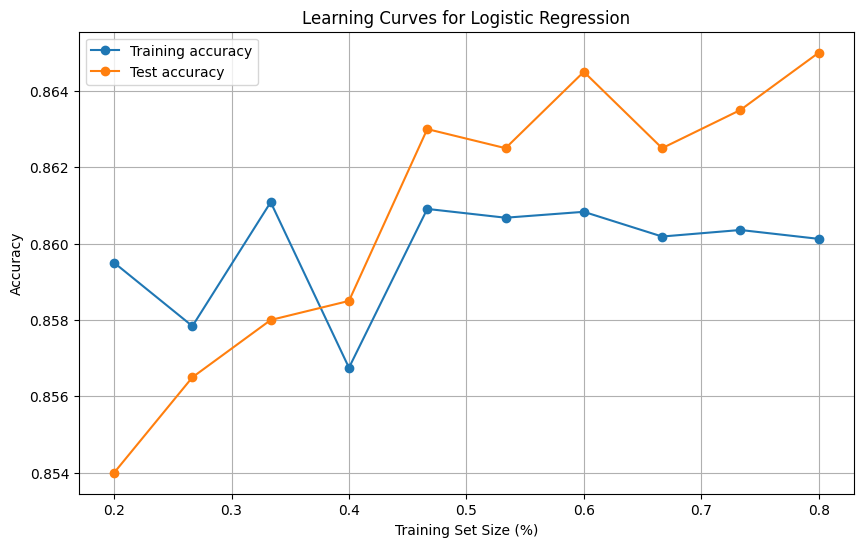

Final training accuracy: 0.8601
Final test accuracy: 0.8650


In [20]:
train_sizes = np.linspace(0.2, 0.8, 10)
train_scores = []
test_scores = []

# Sample for X2
df2_sample = merged_df2.sample(10000)
X2_prepared = df2_sample.drop("Diabetes_binary",axis=1)
y2_prepared = df2_sample["Diabetes_binary"]

for size in train_sizes:
    # Sample a subset of the training data
    sample_size = int(len(X2_prepared) * size)
    X2_sample, _, y2_sample, _ = train_test_split(X2_prepared, y2_prepared, train_size=sample_size, random_state=42)
    
    # Initialize and fit the model
    log_model = LogisticRegression(learning_rate=0.01, max_iters=100000)
    log_model.fit(X2_sample, y2_sample)
    
    # Make predictions on train and test sets
    y2_train_pred = (log_model.predict(X2_sample) >= 0.5).astype(int)
    y2_test_pred = (log_model.predict(X2_test) >= 0.5).astype(int)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y2_sample, y2_train_pred)
    test_accuracy = accuracy_score(y2_test, y2_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)


# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', label='Training accuracy')
plt.plot(train_sizes, test_scores, 'o-', label='Test accuracy')
plt.title('Learning Curves for Logistic Regression')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Print the final scores
print(f"Final training accuracy: {train_scores[-1]:.4f}")
print(f"Final test accuracy: {test_scores[-1]:.4f}")


### Experiment 3.1 Minibatch SGB Linear regression testing

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random

n_test = 100
iterations = random.sample(range(1,10000),n_test)

all_mse = []
all_rmse = []
all_mae = []
all_r2 = []
all_weights = []

for count, i in enumerate(iterations):
    # Split the data with a different random state each time
    X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=i)
    
    # Fit the model and make predictions
    optimizer = GradientDescent(learning_rate=0.001, max_iters=100000,verbose=False)
    model = LinearRegressionSGD(add_bias=True,batch_size=32)
    slr_model = model.fit(X_train,y_train, optimizer)
    yh = slr_model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, yh)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, yh)
    r2 = r2_score(y_test, yh)
    
    if r2 <= 0 or r2 >=1:
        continue    
    
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_mae.append(mae)
    all_r2.append(r2)
    all_weights.append(slr_model.w)
    
    print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

# Convert list of predictions to an average
avg_mse = np.mean(all_mse, axis = 0)
avg_rmse = np.mean(all_rmse, axis = 0)
avg_mae = np.mean(all_mae, axis = 0)
avg_r2 = np.mean(all_r2, axis = 0)
avg_weights = np.mean(all_weights, axis = 0)
    
print("\n")


# mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
print(f"Mean Squared Error: {avg_mse:.4f}")
print(f"Root Mean Squared Error: {avg_rmse:.4f}")
print(f"Mean Absolute Error: {avg_mae:.4f}")
print(f"R-squared Score: {avg_r2:.4f}")

Count: 100/100

Mean Squared Error: 0.0678
Root Mean Squared Error: 0.2601
Mean Absolute Error: 0.2031
R-squared Score: 0.7324


### Experiment 3.1+ : Linear SGD with momentum

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import random

n_test = 100
iterations = random.sample(range(1,10000),n_test)

all_mse = []
all_rmse = []
all_mae = []
all_r2 = []
all_weights = []

for count, i in enumerate(iterations):
    # Split the data with a different random state each time
    X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=i)
    
    # Fit the model and make predictions
    optimizer = GradientDescentM(learning_rate=0.001, max_iters=100000,verbose=False)
    model = LinearRegressionSGD(add_bias=True,batch_size=32)
    slr_model = model.fit(X_train,y_train, optimizer)
    yh = slr_model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, yh)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, yh)
    r2 = r2_score(y_test, yh)
    
    if r2 <= 0 or r2 >=1:
        continue    
    
    all_mse.append(mse)
    all_rmse.append(rmse)
    all_mae.append(mae)
    all_r2.append(r2)
    all_weights.append(slr_model.w)
    
    print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

# Convert list of predictions to an average
avg_mse = np.mean(all_mse, axis = 0)
avg_rmse = np.mean(all_rmse, axis = 0)
avg_mae = np.mean(all_mae, axis = 0)
avg_r2 = np.mean(all_r2, axis = 0)
avg_weights = np.mean(all_weights, axis = 0)
    
print("\n")


# mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
print(f"Mean Squared Error: {avg_mse:.4f}")
print(f"Root Mean Squared Error: {avg_rmse:.4f}")
print(f"Mean Absolute Error: {avg_mae:.4f}")
print(f"R-squared Score: {avg_r2:.4f}")

Count: 100/100

Mean Squared Error: 0.0714
Root Mean Squared Error: 0.2669
Mean Absolute Error: 0.2086
R-squared Score: 0.7224


### Experiment 3.2 Logistic regression with minibatch SGD testing 

In [22]:
#take a subset of X2 and y2.
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score


n_test = 5
iterations = random.sample(range(1,10000),n_test)

all_accuracy = []
all_f1 = []
all_precision = []
all_recall = []
all_weights = []

for count, i in enumerate(iterations):
    # Split the data with a different random state each time
    df2_sample = merged_df2.sample(8000)
    X2_prepared = df2_sample.drop("Diabetes_binary",axis=1)
    y2_prepared = df2_sample["Diabetes_binary"]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2_prepared, y2_prepared, test_size=0.2, random_state=i)
    
    # Fit the model and make predictions
    model = LogisticRegressionSGD(learning_rate=0.01,max_iters=100000,verbose=False,batch_size=32)
    sgd_log_model = model.fit(X2_train, y2_train)
    y2_pred_proba = sgd_log_model.predict(X2_test)
        
    y2h = (y2_pred_proba >= 0.5).astype(int)
    mse = mean_squared_error(y2_test, y2h)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y2_test, y2h)
    r2 = r2_score(y2_test, y2h)
    
    all_accuracy.append(accuracy_score(y2_test, y2h))
    all_precision.append(precision_score(y2_test, y2h))
    all_f1.append(f1_score(y2_test, y2h))
    all_recall.append(recall_score(y2_test, y2h))
    all_weights.append(sgd_log_model.w)
    
    print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

# Convert list of predictions to an average
avg_accuracy =  np.mean(all_accuracy, axis = 0)
avg_f1 = np.mean(all_f1, axis = 0)
avg_precision = np.mean(all_precision, axis = 0)
avg_recall =  np.mean(all_recall, axis = 0)
avg_weights_log = np.mean(all_weights, axis = 0)
    
print("\n")


# mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
print(f"Accuracy: {avg_accuracy:.4f}")
print(f"Precision: {avg_precision:.4f}")
print(f"Recall: {avg_recall:.4f}")
print(f"F1 Score: {avg_f1:.4f}")

Count: 5/5

Accuracy: 0.8642
Precision: 0.4961
Recall: 0.1919
F1 Score: 0.2756


### Experiment 3.3 Linear Regression multi mini batch sizes


In [84]:
batch_sizes = [8, 16, 32, 64, 128, 256, 512, 816] 
compiled_r2 = []
n_test = 5
iterations = random.sample(range(1,10000),n_test)

for batch_size in batch_sizes:
    all_mse = []
    all_rmse = []
    all_mae = []
    all_r2 = []
    all_weights = []

    for count, i in enumerate(iterations):
        # Split the data with a different random state each time
        X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=i)
        
        # Fit the model and make predictions
        optimizer = GradientDescent(learning_rate=0.01, max_iters=100000,verbose=False)
        model = LinearRegressionSGD(add_bias=True,batch_size=batch_size)
        slr_model = model.fit(X_train,y_train, optimizer)
        yh = slr_model.predict(X_test)
        
        
        mse = mean_squared_error(y_test, yh)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, yh)
        r2 = r2_score(y_test, yh)
        if r2 <= 0 or r2 >=1:
            continue
        
        all_mse.append(mse)
        all_rmse.append(rmse)
        all_mae.append(mae)
        all_r2.append(r2)
        all_weights.append(slr_model.w)
        
        print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

    # Convert list of predictions to an average
    avg_mse = np.mean(all_mse, axis = 0)
    avg_rmse = np.mean(all_rmse, axis = 0)
    avg_mae = np.mean(all_mae, axis = 0)
    avg_r2 = np.mean(all_r2, axis = 0)
    avg_weights = np.mean(all_weights, axis = 0)
    compiled_r2.append(avg_r2)
    
    print("\n")
    print(f"Current batch size: {batch_size}")
    # mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
    print(f"Mean Squared Error: {avg_mse:.4f}")
    print(f"Root Mean Squared Error: {avg_rmse:.4f}")
    print(f"Mean Absolute Error: {avg_mae:.4f}")
    print(f"R-squared Score: {avg_r2:.4f}")

Count: 5/5

Current batch size: 8
Mean Squared Error: 0.0741
Root Mean Squared Error: 0.2720
Mean Absolute Error: 0.2132
R-squared Score: 0.6896
[0.6896056858908438]
Count: 5/5

Current batch size: 16
Mean Squared Error: 0.0698
Root Mean Squared Error: 0.2640
Mean Absolute Error: 0.2080
R-squared Score: 0.7067
[0.6896056858908438, 0.7067482546388482]
Count: 5/5

Current batch size: 32
Mean Squared Error: 0.0703
Root Mean Squared Error: 0.2649
Mean Absolute Error: 0.2085
R-squared Score: 0.7040
[0.6896056858908438, 0.7067482546388482, 0.7039952481651046]
Count: 5/5

Current batch size: 64
Mean Squared Error: 0.0701
Root Mean Squared Error: 0.2646
Mean Absolute Error: 0.2091
R-squared Score: 0.7049
[0.6896056858908438, 0.7067482546388482, 0.7039952481651046, 0.7049424483955351]
Count: 5/5

Current batch size: 128
Mean Squared Error: 0.0696
Root Mean Squared Error: 0.2637
Mean Absolute Error: 0.2081
R-squared Score: 0.7069
[0.6896056858908438, 0.7067482546388482, 0.7039952481651046, 0.704

### Experiment 3.4 Logistic Regression multi mini batch sizes

In [86]:
batch_sizes = [8, 16, 32, 64, 128, 256,1024,2048,4096,6000] 

n_test = 5
iterations = random.sample(range(1,10000),n_test)
compiled_f1 = []

for batch_size in batch_sizes:
    
    all_accuracy = []
    all_f1 = []
    all_precision = []
    all_recall = []
    all_weights = []
    
    
    for count, i in enumerate(iterations):
    # Split the data with a different random state each time
        df2_sample = merged_df2.sample(8000)
        X2_prepared = df2_sample.drop("Diabetes_binary",axis=1)
        y2_prepared = df2_sample["Diabetes_binary"]
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2_prepared, y2_prepared, test_size=0.2, random_state=i)
        
        # Fit the model and make predictions
        model = LogisticRegressionSGD(learning_rate=0.01,max_iters=100000,verbose=False,batch_size=batch_size)
        sgd_log_model = model.fit(X2_train, y2_train)
        y2_pred_proba = sgd_log_model.predict(X2_test)
            
        y2h = (y2_pred_proba >= 0.5).astype(int)
        mse = mean_squared_error(y2_test, y2h)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y2_test, y2h)
        r2 = r2_score(y2_test, y2h)
        
        all_accuracy.append(accuracy_score(y2_test, y2h))
        all_precision.append(precision_score(y2_test, y2h))
        all_f1.append(f1_score(y2_test, y2h))
        all_recall.append(recall_score(y2_test, y2h))
        # all_weights.append(sgd_log_model.w)
        
        print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

    # Convert list of predictions to an average
    avg_accuracy =  np.mean(all_accuracy, axis = 0)
    avg_f1 = np.mean(all_f1, axis = 0)
    avg_precision = np.mean(all_precision, axis = 0)
    avg_recall =  np.mean(all_recall, axis = 0)
    # avg_weights_log = np.mean(all_weights, axis = 0)
    compiled_f1.append(avg_f1)
    
    print("\n")

    print(f"Current batch size: {batch_size}")
    # mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
    print(f"Accuracy: {avg_accuracy:.4f}")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall: {avg_recall:.4f}")
    print(f"F1 Score: {avg_f1:.4f}")
    print(compiled_f1)

Count: 5/5

Current batch size: 8
Accuracy: 0.8245
Precision: 0.3995
Recall: 0.4040
F1 Score: 0.4015
[0.4014953694946205]
Count: 5/5

Current batch size: 16
Accuracy: 0.8501
Precision: 0.4275
Recall: 0.3104
F1 Score: 0.3566
[0.4014953694946205, 0.35664083942564956]
Count: 5/5

Current batch size: 32
Accuracy: 0.8610
Precision: 0.5233
Recall: 0.2147
F1 Score: 0.3022
[0.4014953694946205, 0.35664083942564956, 0.30218437037591117]
Count: 5/5

Current batch size: 64
Accuracy: 0.8593
Precision: 0.5001
Recall: 0.1198
F1 Score: 0.1927
[0.4014953694946205, 0.35664083942564956, 0.30218437037591117, 0.19265028933798772]
Count: 5/5

Current batch size: 128
Accuracy: 0.8584
Precision: 0.5638
Recall: 0.1224
F1 Score: 0.1998
[0.4014953694946205, 0.35664083942564956, 0.30218437037591117, 0.19265028933798772, 0.19975297925387708]
Count: 5/5

Current batch size: 256
Accuracy: 0.8658
Precision: 0.5420
Recall: 0.1535
F1 Score: 0.2386
[0.4014953694946205, 0.35664083942564956, 0.30218437037591117, 0.1926502

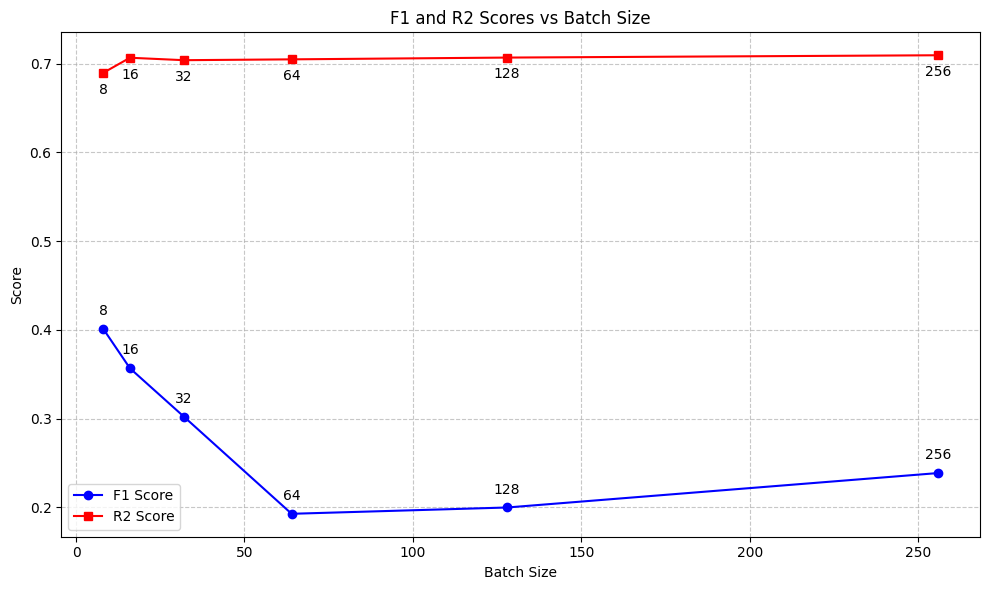

In [95]:
plt.figure(figsize=(10, 6))
batch_sizes1 = [8, 16, 32, 64, 128, 256, 512, 816] 
batch_sizes2 = [8, 16, 32, 64, 128, 256,1024,2048,4096,6000] 

equal_bs = batch_sizes1[:6]
# Plot F1 score
eq_compiled_f1 = compiled_f1[:6]
eq_compiled_r2 = compiled_r2[:6]
plt.plot(equal_bs, eq_compiled_f1, marker='o', linestyle='-', color='blue', label='F1 Score')

# Plot R2 score
plt.plot(equal_bs, eq_compiled_r2, marker='s', linestyle='-', color='red', label='R2 Score')

plt.xlabel('Batch Size')
plt.ylabel('Score')
plt.title('F1 and R2 Scores vs Batch Size')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Use logarithmic scale for x-axis if batch sizes vary widel

# Add batch size labels to each point
for x, y, size in zip(equal_bs, eq_compiled_f1,equal_bs):
    plt.annotate(str(size), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y, size in zip(equal_bs, eq_compiled_r2,equal_bs):
    plt.annotate(str(size), (x, y), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()

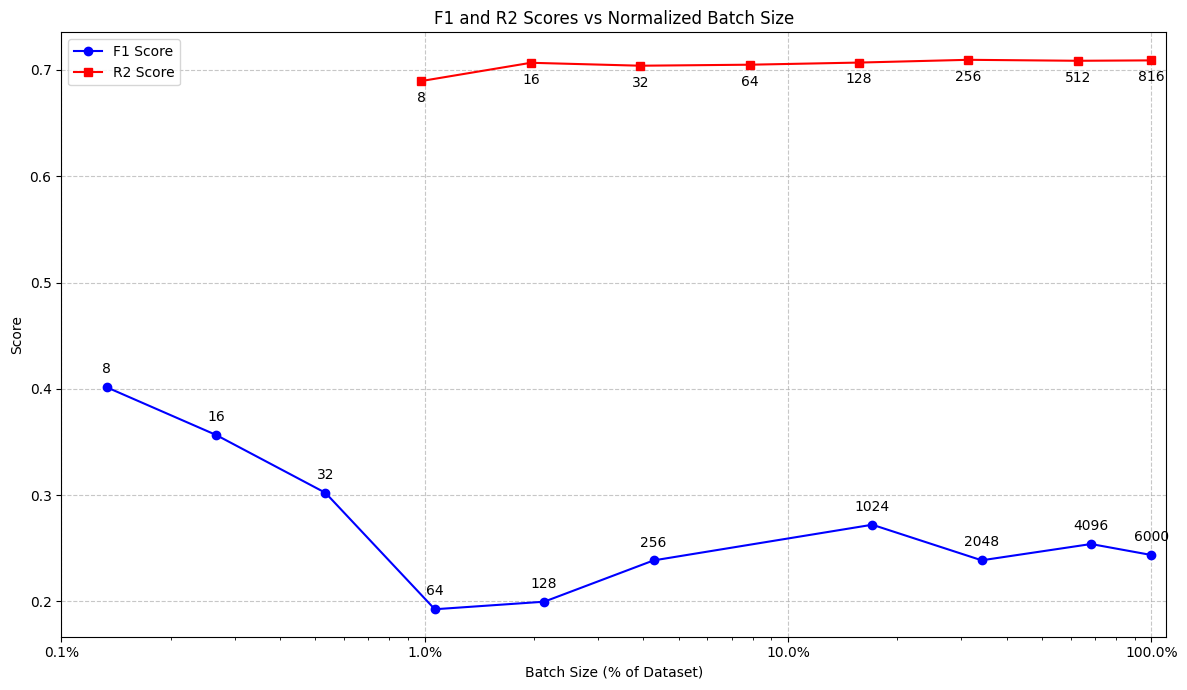

In [98]:
# Total dataset sizes
f1_total_size = 6000
r2_total_size = 816

# Calculate percentage of dataset for each batch size
f1_percentages = [(size / f1_total_size) * 100 for size in batch_sizes2]
r2_percentages = [(size / r2_total_size) * 100 for size in batch_sizes1]

plt.figure(figsize=(12, 7))

# Plot F1 score (10 values)
f1_line = plt.plot(f1_percentages, compiled_f1, marker='o', linestyle='-', color='blue', label='F1 Score')[0]

# Plot R2 score (8 values)
r2_line = plt.plot(r2_percentages, compiled_r2, marker='s', linestyle='-', color='red', label='R2 Score')[0]

plt.xlabel('Batch Size (% of Dataset)')
plt.ylabel('Score')
plt.title('F1 and R2 Scores vs Normalized Batch Size')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Set x-axis to logarithmic scale
plt.xscale('log')

# Set x-axis limits to show full range
plt.xlim(0.1, max(max(f1_percentages), max(r2_percentages)) * 1.1)

# Add percentage signs to x-axis labels
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Add batch size labels to each point
for x, y, size in zip(f1_percentages, compiled_f1, batch_sizes2):
    plt.annotate(str(size), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

for x, y, size in zip(r2_percentages, compiled_r2, batch_sizes1):
    plt.annotate(str(size), (x, y), textcoords="offset points", xytext=(0,-15), ha='center')

plt.tight_layout()
plt.show()

### Experiment 3.5 Linear Regression different learning rates

In [71]:
learning_rates_lr = [0.0001,0.005, 0.01,0.05]
compiled_r2 =[]
n_test = 5
iterations = random.sample(range(1,10000),n_test)

for learning_rate in learning_rates_lr:
    all_mse = []
    all_rmse = []
    all_mae = []
    all_r2 = []
    all_weights = []

    for count, i in enumerate(iterations):
        # Split the data with a different random state each time
        X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=i)
        
        # Fit the model and make predictions
        optimizer = GradientDescent(learning_rate=learning_rate, max_iters=100000,verbose=False)
        model = LinearRegressionSGD(add_bias=True,batch_size=32)
        slr_model = model.fit(X_train,y_train, optimizer)
        yh = slr_model.predict(X_test)
        
        
        mse = mean_squared_error(y_test, yh)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, yh)
        r2 = r2_score(y_test, yh)
        
        all_mse.append(mse)
        all_rmse.append(rmse)
        all_mae.append(mae)
        all_r2.append(r2)
        all_weights.append(slr_model.w)
        
        print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

    # Convert list of predictions to an average
    avg_mse = np.mean(all_mse, axis = 0)
    avg_rmse = np.mean(all_rmse, axis = 0)
    avg_mae = np.mean(all_mae, axis = 0)
    avg_r2 = np.mean(all_r2, axis = 0)
    avg_weights = np.mean(all_weights, axis = 0)
    compiled_r2.append(avg_r2)
    
    print("\n")
    print(f"Current learning rate: {learning_rate}")
    # mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
    print(f"Mean Squared Error: {avg_mse:.4f}")
    print(f"Root Mean Squared Error: {avg_rmse:.4f}")
    print(f"Mean Absolute Error: {avg_mae:.4f}")
    print(f"R-squared Score: {avg_r2:.4f}")

Count: 5/5

Current learning rate: 0.0001
Mean Squared Error: 0.0753
Root Mean Squared Error: 0.2742
Mean Absolute Error: 0.2136
R-squared Score: 0.7037
Count: 5/5

Current learning rate: 0.005
Mean Squared Error: 0.0697
Root Mean Squared Error: 0.2640
Mean Absolute Error: 0.2065
R-squared Score: 0.7261
Count: 5/5

Current learning rate: 0.01
Mean Squared Error: 0.0694
Root Mean Squared Error: 0.2632
Mean Absolute Error: 0.2066
R-squared Score: 0.7277
Count: 5/5

Current learning rate: 0.05
Mean Squared Error: 0.0733
Root Mean Squared Error: 0.2706
Mean Absolute Error: 0.2111
R-squared Score: 0.7132


### Experiment 3.6: Logistic Regression different learning rates

In [72]:
learning_rates_log = [0.0001,0.005, 0.01,0.05,0.1]


n_test = 5
iterations = random.sample(range(1,10000),n_test)
compiled_f1 = [] 

for learning_rate in learning_rates_log:
    
    all_accuracy = []
    all_f1 = []
    all_precision = []
    all_recall = []
    all_weights = []
    
    for count, i in enumerate(iterations):
    # Split the data with a different random state each time
        df2_sample = merged_df2.sample(8000)
        X2_prepared = df2_sample.drop("Diabetes_binary",axis=1)
        y2_prepared = df2_sample["Diabetes_binary"]
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2_prepared, y2_prepared, test_size=0.2, random_state=i)
        
        # Fit the model and make predictions
        model = LogisticRegressionSGD(learning_rate=learning_rate,max_iters=100000,verbose=False,batch_size=16)
        sgd_log_model = model.fit(X2_train, y2_train)
        y2_pred_proba = sgd_log_model.predict(X2_test)
            
        y2h = (y2_pred_proba >= 0.5).astype(int)
        
        all_accuracy.append(accuracy_score(y2_test, y2h))
        all_precision.append(precision_score(y2_test, y2h))
        all_f1.append(f1_score(y2_test, y2h))
        all_recall.append(recall_score(y2_test, y2h))
        all_weights.append(sgd_log_model.w)
        
        print(f"\rCount: {count+1}/{n_test}", end="", flush=True)

    # Convert list of predictions to an average
    avg_accuracy =  np.mean(all_accuracy, axis = 0)
    avg_f1 = np.mean(all_f1, axis = 0)
    avg_precision = np.mean(all_precision, axis = 0)
    avg_recall =  np.mean(all_recall, axis = 0)
    avg_weights_log = np.mean(all_weights, axis = 0)
    compiled_f1.append(avg_f1)   
    
    print("\n")

    print(f"Current learning rate: {learning_rate}")
    # mse,rmse,mae,r2,avg_weights = evaluate_lr(X_prepared,y)
    print(f"Accuracy: {avg_accuracy:.4f}")
    print(f"Precision: {avg_precision:.4f}")
    print(f"Recall: {avg_recall:.4f}")
    print(f"F1 Score: {avg_f1:.4f}")

Count: 5/5

Current learning rate: 0.0001
Accuracy: 0.8086
Precision: 0.3782
Recall: 0.5026
F1 Score: 0.4307
Count: 5/5

Current learning rate: 0.005
Accuracy: 0.8357
Precision: 0.4066
Recall: 0.4341
F1 Score: 0.4182
Count: 5/5

Current learning rate: 0.01
Accuracy: 0.8495
Precision: 0.4332
Recall: 0.3015
F1 Score: 0.3547
Count: 5/5

Current learning rate: 0.05
Accuracy: 0.8595
Precision: 0.5636
Recall: 0.1507
F1 Score: 0.2364
Count: 5/5

Current learning rate: 0.1
Accuracy: 0.8696
Precision: 0.5048
Recall: 0.1340
F1 Score: 0.2091


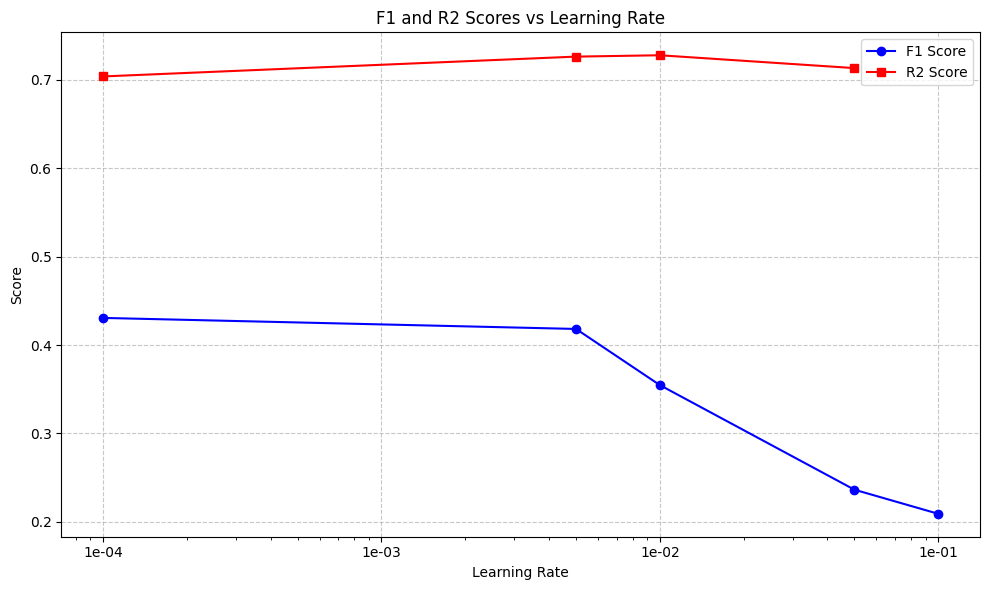

In [77]:
plt.figure(figsize=(10, 6))

# Plot F1 score
plt.plot(learning_rates_log, compiled_f1, marker='o', linestyle='-', color='blue', label='F1 Score')

# Plot R2 score
plt.plot(learning_rates_lr, compiled_r2, marker='s', linestyle='-', color='red', label='R2 Score')

plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.title('F1 and R2 Scores vs Learning Rate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Use logarithmic scale for x-axis as learning rates often span multiple orders of magnitude
plt.xscale('log')

# Use scientific notation for x-axis labels
plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0e}'))

plt.tight_layout()
plt.show()